<a href="https://colab.research.google.com/github/shejalbendre/Data-Analytics-Beginner-level-Task-1/blob/main/Beginner_Level_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LetsGrowMore**

**Author - Shejal Bendre**

**Data Science Intern**

**Beginner Level Task 1 - Iris Flowers Classification ML Project**

**Importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Importing the dataset**

In [ ]:
iris = pd.read_csv(r'/content/sample_data/IRIS.csv')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.max()

sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.min()

sepal_length            4.3
sepal_width             2.0
petal_length            1.0
petal_width             0.1
species         Iris-setosa
dtype: object

In [ ]:
r,c = iris.shape
print("Number of rows = ",r)
print("Number of columns = ",c)

Number of rows =  150
Number of columns =  5


**Visualization**

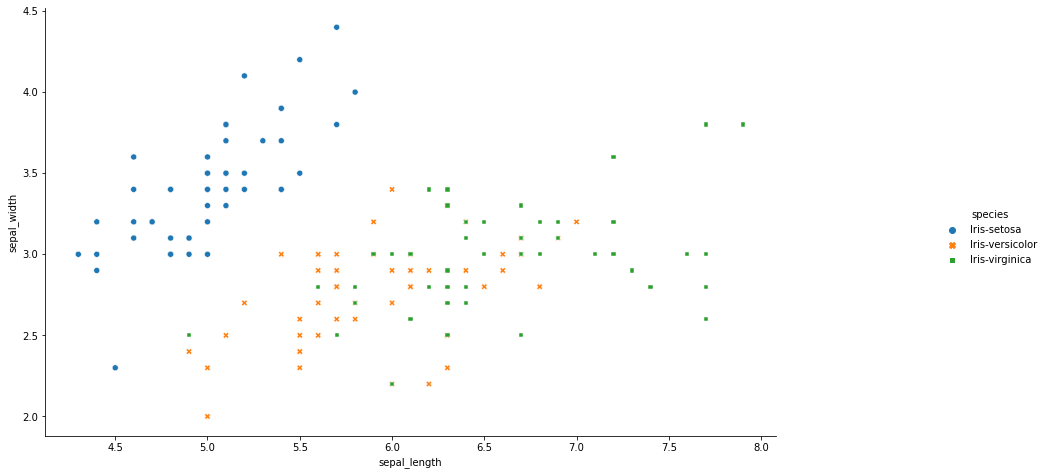

In [ ]:
g=sns.relplot(x='sepal_length',y='sepal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(16,7)
plt.show()

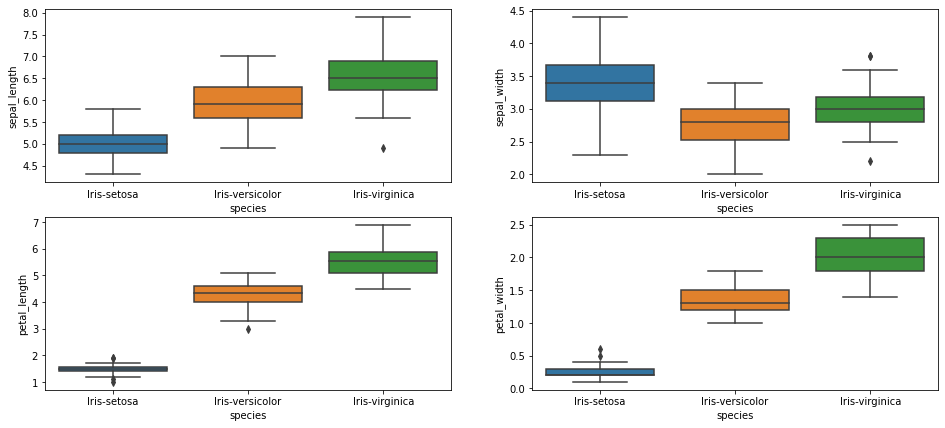

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.show()

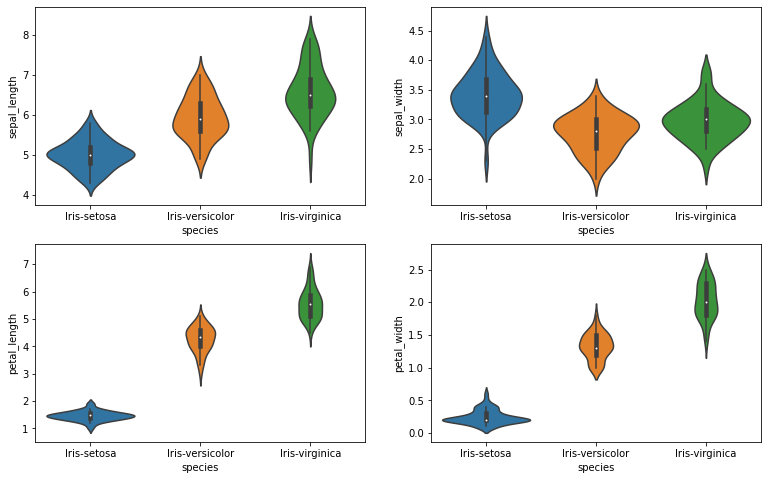

In [ ]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.show()

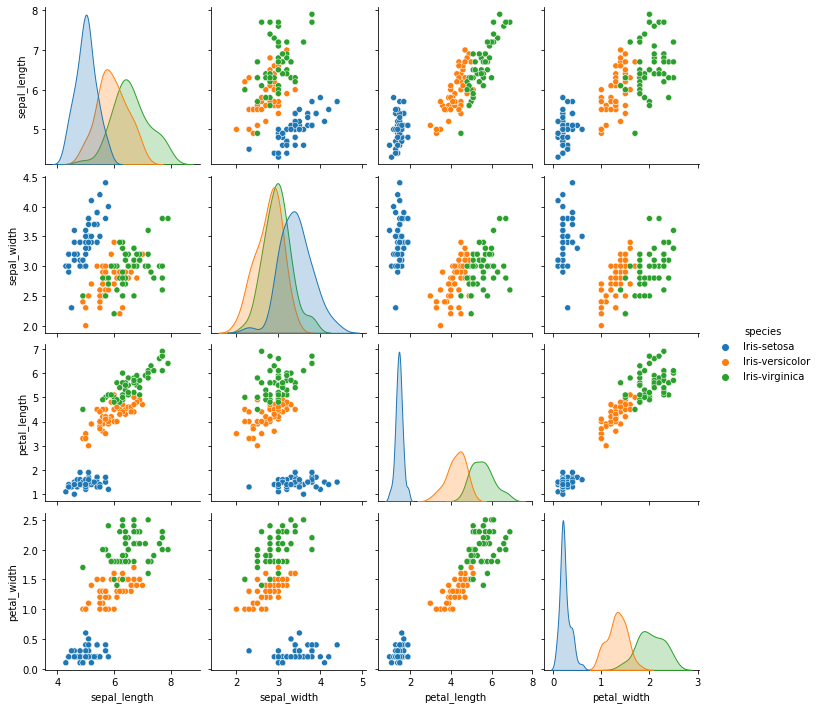

In [ ]:
sns.pairplot(data=iris,hue='species')

**Correlation Matrix**

[]

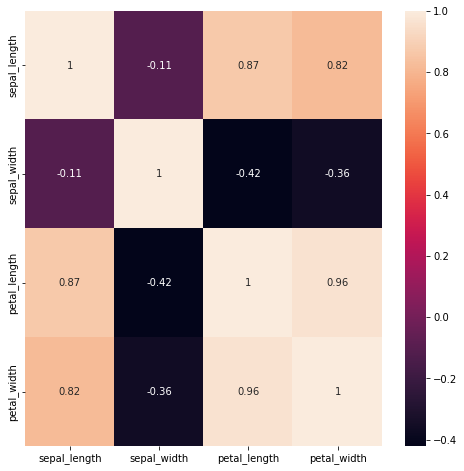

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

**Statistical Analysis**

In [ ]:
iris.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Metrics**

In [ ]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

**Model Selection**

In [ ]:

from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**K Nearest Neighbours**


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)
knn_acc = round(knn.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("Accuracy of K Nearest Neighbour = ",acc)
print("Precision of K Nearest Neighbour = ",prec)
print("Recall of K Nearest Neighbour = ",recall)
print("f1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy of K Nearest Neighbour =  0.9666666666666667
Precision of K Nearest Neighbour =  0.9666666666666667
Recall of K Nearest Neighbour =  0.9666666666666667
f1 score of K Nearest Neighbour =  0.9666666666666667


**KNN**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


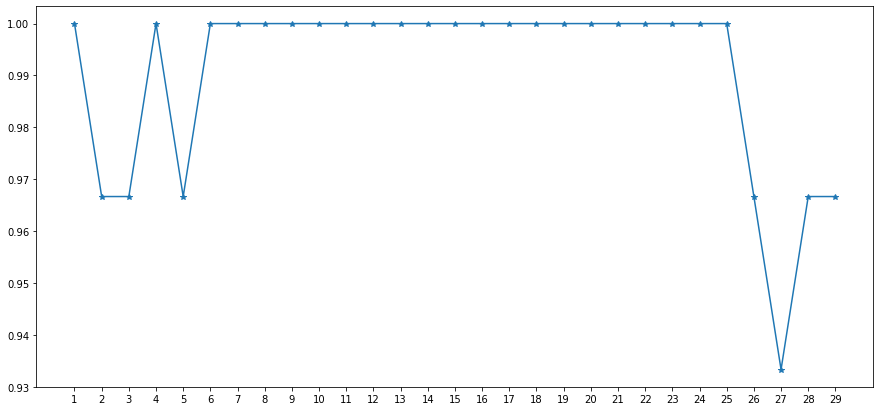

In [ ]:
plt.figure(figsize=(15,7))
a_index = list(range(1,30))
a = pd.Series()
x = range(1,30)
for i in list(range(1,30)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  prediction = model.predict(x_test)
  a = a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index,a,marker="*")
plt.xticks(x)
plt.show()

**Thank You!!!**